# 토큰화

토큰화(tokenization)는 자연어를 **모델이 이해할 수 있는 또는 모델이 다룰 수있는 기본 단위(Token)** 분할하는 과정을 말한다.   
토큰으로 나누는 단위는 설계에 따라 문장, 어절, 형태소, 서브워드, 문자, 자모/알파벳 등 다양한 방식으로 나눌 수 있다.   
- 예
```bash
원문: "자연어 처리는 재미있다"
토큰화: ["자연어", "처리", "는", "재미있다"]
```

## 토큰화 방식
- **단어 기반 토큰화(Word-Level Tokenization)**
    - 어절(공백으로 구분) 또는 형태소 단위로 단어를 나누는 전통적인 방식이다.
    - **한국어**는 교착어로 하나의 단어에 다양한 조사/어미가 결합된다. 그래서 어절단위로 토큰화할 경우 어휘사전의 크기가 기하급수적으로 늘어나는 문제가 있다.
      - 예) "학교", "학교가", "학교를", "학교에", "학교에서", "학교로", "학교의", ...
    - 이로 인해 미등록어휘(OOV - Out of Vocabulary)의 증가, 같은 의미를 가지는 단어들이 Vocab에 중복 등록, 메모리 낭비, 학습효율성 저하 등 다양한 문제가 생긴다.
    - 그래서 **한국어의 경우 형태소 단위 토큰화**가 필요하다.

- **서브워드 기반(Subword-level) — BPE, WordPiece, Unigram**
    - Transformer 기반 모델(BERT, GPT, LLaMA 등)에서 표준으로 사용하는 방식.
    - 단어를 기준으로 토큰화하지 않고 **문자(character)와 단어(word)의 중간 수준인 서브워드(subword) 단위로 토큰화**한다.
    - **동작 원리**:
        - 자주 등장하는 문자열 조합(서브워드)을 하나의 토큰으로 구성한다.
        - 빈도가 높은 단어는 하나의 토큰으로, 빈도가 낮거나 희귀한 단어는 여러 서브워드로 분할한다.
    - **예시**:
        ```bash
        입력: "나는 밥을 먹었습니다. 나는 어제 밥을 했습니다."
        
        서브워드 토큰화 결과 (예시):
        ["나는", "밥", "을", "먹", "었", "습니다", ".", "나는", "어제", "밥", "을", "하", "었", "습니다", "."]
        ```
    - **장점**:
        - **미등록 단어(OOV) 문제 해결**: 모든 단어를 서브워드 조합으로 표현 가능
        - **어휘 사전 크기 최적화**: 단어 단위보다 작고, 문자 단위보다 효율적
        - **다국어 지원**: 언어에 구애받지 않는 범용적 토큰화
        - **형태론적 의미 포착**: 접두사, 접미사 등의 의미를 학습 가능
    - **주요 알고리즘**:
        - **BPE (Byte Pair Encoding)**: 가장 빈번한 연속 바이트/문자 쌍을 반복적으로 병합
        - **WordPiece**: BERT에서 사용, BPE와 유사하지만 likelihood 기반으로 병합
        - **Unigram**: 확률 모델 기반으로 최적의 서브워드 분할 선택


# 한국어 형태소 분석기

- kiwipiepy와 konlpy 는 대표적인 한국어 형태소 분석기이다.

## kiwipiepy
**kiwipiepy**는 C++로 구현된 한국어 형태소 분석기 Kiwi(Korean Intelligent Word Identifier)를 Python 환경에서 사용할 수 있도록 한 라이브러리이다.

- 빠른 속도  
- 최신 품사 체계 지원  
- 사용자 사전 확장 용이  
- 최근 가장 널리 쓰이는 한국어 토크나이저 중 하나이다.
- https://github.com/bab2min/kiwipiepy
  
### 설치 방법

```bash
pip install kiwipiepy
```


In [ ]:
# uv pip install ipykernel ipywidgets

In [ ]:
import kiwipiepy

### 주요 클래스 및 함수

#### Kiwi 클래스
- Kiwi의 핵심 클래스이며, 형태소 분석과 토큰화 기능을 모두 제공한다.
- Kiwi 품사는 세종 말뭉치를 기반으로 한다.
  - 품사 시작 글자
  - 체언(명사, 대명사): `N`, 용언(동사, 형용사): `V`, 수식언(관형사, 부사): `M`,  관계언(조사):`J`, 어미: `E`, 기호: `S`
    - https://github.com/bab2min/kiwipiepy?tab=readme-ov-file#%ED%92%88%EC%82%AC-%ED%83%9C%EA%B7%B8
- 메소드
  - `tokenzie(text)`: 형태소 분석 기반 토큰화 수행
  - `analyze(text)`: tokenize보다 좀 더 상세한 분석을 진행한다. 여러 분석결과를 조회할 수있다.
  - `add_user_word(word, pos, score)`: 사전에 직접 단어 등록
  - `space(text)`: 띄어 쓰기 교정

In [ ]:
# uv pip uninstall kiwipiepy

# uv pip install kiwipiepy==0.21.0

In [ ]:
from kiwipiepy import Kiwi
from pprint import pprint  # 자료구조 출력을 보기 좋게 print해줌.

In [ ]:
kiwi = Kiwi()

In [ ]:
####################
# 토큰화 - tokenize()
####################
text = "나는 자연어 처리를 공부한다.\n내일은 뭘 공부할까?"
tokens = kiwi.tokenize(text)
pprint(tokens)

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='는', tag='JX', start=1, len=1),
 Token(form='자연어 처리', tag='NNP', start=3, len=6),
 Token(form='를', tag='JKO', start=9, len=1),
 Token(form='공부', tag='NNG', start=11, len=2),
 Token(form='하', tag='XSV', start=13, len=1),
 Token(form='ᆫ다', tag='EF', start=13, len=2),
 Token(form='.', tag='SF', start=15, len=1),
 Token(form='내일', tag='NNG', start=17, len=2),
 Token(form='은', tag='JX', start=19, len=1),
 Token(form='뭐', tag='NP', start=21, len=1),
 Token(form='ᆯ', tag='JKO', start=21, len=1),
 Token(form='공부', tag='NNG', start=23, len=2),
 Token(form='하', tag='XSV', start=25, len=1),
 Token(form='ᆯ까', tag='EF', start=25, len=2),
 Token(form='?', tag='SF', start=27, len=1)]


In [ ]:
# Token 객체에서 속성값들 조회
for token in tokens:
    r = f"토큰문자열: {token.form}, 원형(lemma): {token.lemma}, 품사(Tag): {token.tag}\
시작위치: {token.start}, 글자수: {token.len}, 토큰이 있는 행번호: {token.line_number}, \
몇번째 문장에 있는지: {token.sent_position}, 문장에서 몇번째 어절인지: {token.word_position}"

    print(r)


토큰문자열: 나, 원형(lemma): 나, 품사(Tag): NP시작위치: 0, 글자수: 1, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 0
토큰문자열: 는, 원형(lemma): 는, 품사(Tag): JX시작위치: 1, 글자수: 1, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 0
토큰문자열: 자연어 처리, 원형(lemma): 자연어 처리, 품사(Tag): NNP시작위치: 3, 글자수: 6, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 1
토큰문자열: 를, 원형(lemma): 를, 품사(Tag): JKO시작위치: 9, 글자수: 1, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 2
토큰문자열: 공부, 원형(lemma): 공부, 품사(Tag): NNG시작위치: 11, 글자수: 2, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 3
토큰문자열: 하, 원형(lemma): 하, 품사(Tag): XSV시작위치: 13, 글자수: 1, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 3
토큰문자열: ᆫ다, 원형(lemma): ᆫ다, 품사(Tag): EF시작위치: 13, 글자수: 2, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 3
토큰문자열: ., 원형(lemma): ., 품사(Tag): SF시작위치: 15, 글자수: 1, 토큰이 있는 행번호: 0, 몇번째 문장에 있는지: 0, 문장에서 몇번째 토큰인지: 3
토큰문자열: 내일, 원형(lemma): 내일, 품사(Tag): NNG시작위치: 17, 글자수: 2, 토큰이 있는 행번호: 1, 몇번째 문장에 있는지: 1, 문장에서 몇번째 토큰인지: 0
토큰문자열: 은, 원형(lemma): 은, 품사(Tag): JX시작위치: 19, 글자수: 1, 토큰이 있는 행번호: 1, 몇번째 문장

In [ ]:
# 여러 문서를 토큰화할 때는 list로 묶어서 전달.
# 결과: Iterable -> 한번에 한 문서의 결과를 반환.
text_list = ["나는 자연어 처리를 공부한다. 자연어처리는 NLP라고 한다.", "내일은 뭘 공부할까?"]
tokens = kiwi.tokenize(text_list)
tokens

In [ ]:
for token_list in tokens:
    print(token_list)

[Token(form='나', tag='NP', start=0, len=1), Token(form='는', tag='JX', start=1, len=1), Token(form='자연어 처리', tag='NNP', start=3, len=6), Token(form='를', tag='JKO', start=9, len=1), Token(form='공부', tag='NNG', start=11, len=2), Token(form='하', tag='XSV', start=13, len=1), Token(form='ᆫ다', tag='EF', start=13, len=2), Token(form='.', tag='SF', start=15, len=1), Token(form='자연어 처리', tag='NNP', start=17, len=5), Token(form='는', tag='JX', start=22, len=1), Token(form='NLP', tag='SL', start=24, len=3), Token(form='이', tag='VCP', start=27, len=0), Token(form='라고', tag='EC', start=27, len=2), Token(form='하', tag='VV', start=30, len=1), Token(form='ᆫ다', tag='EF', start=30, len=2), Token(form='.', tag='SF', start=32, len=1)]
[Token(form='내일', tag='NNG', start=0, len=2), Token(form='은', tag='JX', start=2, len=1), Token(form='뭐', tag='NP', start=4, len=1), Token(form='ᆯ', tag='JKO', start=4, len=1), Token(form='공부', tag='NNG', start=6, len=2), Token(form='하', tag='XSV', start=8, len=1), Token(form='

In [ ]:
##############################
# 상세한 토큰화 분석 - analyze()
##############################
text = "나는 자연어 처리를 공부한다."
result = kiwi.analyze(text, top_n=3)
pprint(result)

[([Token(form='나', tag='NP', start=0, len=1),
   Token(form='는', tag='JX', start=1, len=1),
   Token(form='자연어 처리', tag='NNP', start=3, len=6),
   Token(form='를', tag='JKO', start=9, len=1),
   Token(form='공부', tag='NNG', start=11, len=2),
   Token(form='하', tag='XSV', start=13, len=1),
   Token(form='ᆫ다', tag='EF', start=13, len=2),
   Token(form='.', tag='SF', start=15, len=1)],
  -34.043087005615234),
 ([Token(form='나', tag='VV', start=0, len=1),
   Token(form='는', tag='ETM', start=1, len=1),
   Token(form='자연어 처리', tag='NNP', start=3, len=6),
   Token(form='를', tag='JKO', start=9, len=1),
   Token(form='공부', tag='NNG', start=11, len=2),
   Token(form='하', tag='XSV', start=13, len=1),
   Token(form='ᆫ다', tag='EF', start=13, len=2),
   Token(form='.', tag='SF', start=15, len=1)],
  -41.246360778808594),
 ([Token(form='나', tag='NNG', start=0, len=1),
   Token(form='는', tag='JX', start=1, len=1),
   Token(form='자연어 처리', tag='NNP', start=3, len=6),
   Token(form='를', tag='JKO', start=9,

In [ ]:
text_list = ["나는 자연어 처리를 공부한다. 자연어처리는 NLP라고 한다.", "내일은 뭘 공부할까?"]
result = kiwi.analyze(text_list, top_n=2)
# result
for r in result:
    pprint(r)

[([Token(form='나', tag='NP', start=0, len=1),
   Token(form='는', tag='JX', start=1, len=1),
   Token(form='자연어 처리', tag='NNP', start=3, len=6),
   Token(form='를', tag='JKO', start=9, len=1),
   Token(form='공부', tag='NNG', start=11, len=2),
   Token(form='하', tag='XSV', start=13, len=1),
   Token(form='ᆫ다', tag='EF', start=13, len=2),
   Token(form='.', tag='SF', start=15, len=1),
   Token(form='자연어 처리', tag='NNP', start=17, len=5),
   Token(form='는', tag='JX', start=22, len=1),
   Token(form='NLP', tag='SL', start=24, len=3),
   Token(form='이', tag='VCP', start=27, len=0),
   Token(form='라고', tag='EC', start=27, len=2),
   Token(form='하', tag='VV', start=30, len=1),
   Token(form='ᆫ다', tag='EF', start=30, len=2),
   Token(form='.', tag='SF', start=32, len=1)],
  -64.47059631347656),
 ([Token(form='나', tag='VV', start=0, len=1),
   Token(form='는', tag='ETM', start=1, len=1),
   Token(form='자연어 처리', tag='NNP', start=3, len=6),
   Token(form='를', tag='JKO', start=9, len=1),
   Token(form=

In [ ]:
########################
# 띄어쓰기 교정 - space()
########################
text = "자연어처리는재미있는분야이다.또재미있는것은뭐가있을까?"
result = kiwi.space(text)
result

'자연어 처리는 재미있는 분야이다. 또 재미있는 것은 뭐가 있을까?'

In [ ]:
text_list = ["자연어처리는재미있는분야이다.또재미있는것은뭐가있을까?", "아버지가방에들어가신다"]
result = kiwi.space(text_list)
result
for r in result:
    print(r)

자연어 처리는 재미있는 분야이다. 또 재미있는 것은 뭐가 있을까?
아버지가 방에 들어가신다


In [ ]:
################################
# 문장분리 -  split_into_sents()
################################
txt = "대표팀 공격수오현규(헹크)는 시즌9호골을터뜨렸고양현준(셀틱)은 1개월만에 선발출전한 경기에서 득점포를 가동했다 측면 수비수 설영우(즈베즈다)는 생애 첫 유로파리그 어시스트를 기록했다오현규는 28일(이하 한국시간) 벨기에 헹크의 세게카 아레나에서 열린 FC바젤(스위스)과 2025-26 유럽축구연맹(UEFA) 유로파리그리그 페이즈 5라운드에서선제골을 넣으며 2-1 승리를 견인했다헹크의최전방 공격수로 선발 출전한 오현규는 후반 30분 교체되기 전까지 75분을 뛰며 승리에일조했다"
result = kiwi.split_into_sents(txt)
result

[Sentence(text='대표팀 공격수오현규(헹크)는 시즌9호골을터뜨렸고양현준(셀틱)은 1개월만에 선발출전한 경기에서 득점포를 가동했다', start=0, end=61, tokens=None, subs=[]),
 Sentence(text='측면 수비수 설영우(즈베즈다)는 생애 첫 유로파리그 어시스트를 기록했다', start=62, end=101, tokens=None, subs=[]),
 Sentence(text='오현규는 28일(이하 한국시간) 벨기에 헹크의 세게카 아레나에서 열린 FC바젤(스위스)과 2025-26 유럽축구연맹(UEFA) 유로파리그리그 페이즈 5라운드에서선제골을 넣으며 2-1 승리를 견인했다', start=101, end=211, tokens=None, subs=[]),
 Sentence(text='헹크의최전방 공격수로 선발 출전한 오현규는 후반 30분 교체되기 전까지 75분을 뛰며 승리에일조했다', start=211, end=266, tokens=None, subs=[])]

In [ ]:
# 위 분리된 문장에서 띄어쓰기 교정
for sent in result:
    print(kiwi.space(sent.text))

대표 팀 공격수 오 현 규(헹크)는 시즌 9호 골을 터뜨렸고 양현 준(셀틱)은 1개월 만에 선발 출전한 경기에서 득점포를 가동했다
측면 수비수 설영우(즈베즈다)는 생애 첫 유로파 리그 어시스트를 기록했다
오 현 규는 28일(이하 한국 시간) 벨기에 헹크의 세게카 아레나에서 열린 FC 바젤(스위스)과 2025-26 유럽축구연맹(UEFA) 유로파 리그 리그 페이즈 5 라운드에서 선제골을 넣으며 2-1 승리를 견인했다
헹크의 최전방 공격수로 선발 출전한 오현규는 후반 30분 교체되기 전까지 75분을 뛰며 승리에 일조했다


In [ ]:
txt = "어제 친구가 '집에 가고 싶다.' 라고 이야기 했다."
result = kiwi.split_into_sents(txt) # 결과: list[Sentence]
print(result)

[Sentence(text="어제 친구가 '집에 가고 싶다.' 라고 이야기 했다.", start=0, end=29, tokens=None, subs=[Sentence(text='집에 가고 싶다.', start=8, end=17, tokens=None, subs=None)])]


In [ ]:
print(result[0].text)

어제 친구가 '집에 가고 싶다.' 라고 이야기 했다.


In [ ]:
sent = result[0]
if sent.subs != None:
    print(sent.subs[0].text)

집에 가고 싶다.


In [ ]:
###########################################################################
# 사전에 사용자단어 추가. - add_user_word(단어, 품사, score)
# - score: 토큰화할 때 그 단어의 우선순위를 조절하는 가중치 값. 클 수록 더 선호하게 된다.
#          0: 중립값. 고유명사들은 0을 지정한다.
# - 딥러닝: 5, 딥: 10, 러닝: 10 -> 딥, 러닝 으로 나누는 것을 더 선호하게된다.
###########################################################################
text = "박새로이가 왔다."
kiwi.tokenize(text)

[Token(form='박새', tag='NNG', start=0, len=2),
 Token(form='로', tag='JKB', start=2, len=1),
 Token(form='이', tag='NNG', start=3, len=1),
 Token(form='가', tag='JKS', start=4, len=1),
 Token(form='오', tag='VV', start=6, len=1),
 Token(form='었', tag='EP', start=6, len=1),
 Token(form='다', tag='EF', start=7, len=1),
 Token(form='.', tag='SF', start=8, len=1)]

In [ ]:
kiwi.add_user_word("박새로이", "NNP", 0)
kiwi.tokenize(text)

[Token(form='박새로이', tag='NP', start=0, len=4),
 Token(form='가', tag='JKS', start=4, len=1),
 Token(form='오', tag='VV', start=6, len=1),
 Token(form='었', tag='EP', start=6, len=1),
 Token(form='다', tag='EF', start=7, len=1),
 Token(form='.', tag='SF', start=8, len=1)]

In [ ]:
##########################################################
# 불용어(Stop words) 처리 - 토큰화 했을 때 제거할 토큰(단어)들.
###########################################################

# kiwi 제공하는 불용어
from kiwipiepy.utils import Stopwords

sw = Stopwords()

In [ ]:
# 불용어 조회
# sw.stopwords
len(sw.stopwords)

100

In [ ]:
text = "나는 자연어 처리를 공부한다. 자연어처리는 NLP라고 한다."
result = kiwi.tokenize(text)
result

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='는', tag='JX', start=1, len=1),
 Token(form='자연어 처리', tag='NNP', start=3, len=6),
 Token(form='를', tag='JKO', start=9, len=1),
 Token(form='공부', tag='NNG', start=11, len=2),
 Token(form='하', tag='XSV', start=13, len=1),
 Token(form='ᆫ다', tag='EF', start=13, len=2),
 Token(form='.', tag='SF', start=15, len=1),
 Token(form='자연어 처리', tag='NNP', start=17, len=5),
 Token(form='는', tag='JX', start=22, len=1),
 Token(form='NLP', tag='SL', start=24, len=3),
 Token(form='이', tag='VCP', start=27, len=0),
 Token(form='라고', tag='EC', start=27, len=2),
 Token(form='하', tag='VV', start=30, len=1),
 Token(form='ᆫ다', tag='EF', start=30, len=2),
 Token(form='.', tag='SF', start=32, len=1)]

In [ ]:
# stopwords 들 제거 - stopwords객체.filter(토큰list)
result2 = sw.filter(result)
result2

[Token(form='자연어 처리', tag='NNP', start=3, len=6),
 Token(form='공부', tag='NNG', start=11, len=2),
 Token(form='자연어 처리', tag='NNP', start=17, len=5),
 Token(form='NLP', tag='SL', start=24, len=3),
 Token(form='라고', tag='EC', start=27, len=2)]

In [ ]:
############
# 불용어 추가/삭제
# sw.add(("단어", "품사Tag"))  #품사 tag 생략 -> NNP(고유명사)
# sw.remove(("단어", "품사Tag"))

In [ ]:
result = kiwi.tokenize("이름이 박새로이입니다.")
print(result)
sw.filter(result)

[Token(form='이름', tag='NNG', start=0, len=2), Token(form='이', tag='JKS', start=2, len=1), Token(form='박새로이', tag='NP', start=4, len=4), Token(form='이', tag='VCP', start=8, len=1), Token(form='ᆸ니다', tag='EF', start=8, len=3), Token(form='.', tag='SF', start=11, len=1)]


[Token(form='이름', tag='NNG', start=0, len=2),
 Token(form='박새로이', tag='NP', start=4, len=4),
 Token(form='ᆸ니다', tag='EF', start=8, len=3)]

In [ ]:
sw.add(("박새로이", "NNP"))
sw.filter(result)

[Token(form='이름', tag='NNG', start=0, len=2),
 Token(form='ᆸ니다', tag='EF', start=8, len=3)]

In [ ]:
sw.remove(('박새로이', 'NNP'))
sw.filter(result)

[Token(form='이름', tag='NNG', start=0, len=2),
 Token(form='박새로이', tag='NP', start=4, len=4),
 Token(form='ᆸ니다', tag='EF', start=8, len=3)]

In [ ]:
# 명사만 추출
result = kiwi.tokenize("나는 NLP 공부를 어제부터 시작했습니다.")
token_list = []
for token in result:
    if token.tag.startswith('N'): # 명사는 N으로 시작.
        token_list.append(token)

token_list

[Token(form='나', tag='NP', start=0, len=1),
 Token(form='공부', tag='NNG', start=7, len=2),
 Token(form='어제', tag='NNG', start=11, len=2),
 Token(form='시작', tag='NNG', start=16, len=2)]

## KoNLPy(코엔엘파이)
- KoNLPY는 한국어 자연어 처리(Natural Language Processing) 파이썬 라이브러리이다.  한국어 처리를 위한 tokenize, 형태소 분석, 어간추출, 품사부착(POS Tagging) 등의 기능을 제공한다.
- http://KoNLPy.org/ko/latest/
- 기존의 개발된 다양한 형태소 분석기를 통합해서 동일한 interface로 호출 할 수 있게 해준다.

### KoNLPy 설치
- 설치 순서
  1. Java 실행환경 설치
  2. JPype1 설치
  3. koNLPy 설치

1. **Java 설치**
  - https://www.oracle.com/java/technologies/downloads/
    - OS에 맞는 설치 버전을 다운받아 설치한다.
    - MAC: ARM일 경우: **ARM64 CPU** - ARM64 DMG Installer, **Intel CPU**: x64 DMG Installer
  - 시스템 환경변수 설정
      - `JAVA_HOME` : 설치 경로 지정
      - `Path` : `설치경로\bin` 경로 지정

2. **JPype1 설치**
   - 파이썬에서 자바 모듈을 호출하기 위한 연동 패키지
   - 설치: `pip install JPype1`

3. **KoNLPy 설치**
- `pip install konlpy`

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev pyhon3-dev
pip3 install jpype1
pip3 install konlpy

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cli.github.com/packages stable InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,153 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,491 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu 

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Package 'python-dev' has no installation candidate
E: Unable to locate package pyhon3-dev


In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
import konlpy

### 형태소 분석기/사전
- 형태소 사전을 내장하고 있으며 형태소 분석 함수들을 제공하는 모듈

#### KoNLPy 제공 형태소 분석기
- Open Korean Text
    - 트위터에서 개발
    - https://github.com/open-korean-text/open-korean-text
- Hannanum(한나눔)
    - KAIST Semantic Web Research Center 에서 개발
    - http://semanticweb.kaist.ac.kr/hannanum/
- Kkma(꼬꼬마)
    - 서울대학교 IDS(Intelligent Data Systems) 연구실 개발.
    - http://kkma.snu.ac.kr/
- Komoran(코모란)
    - Shineware에서 개발.
    - 오픈소스버전과 유료버전이 있음
    - https://github.com/shin285/KOMORAN
- Mecab(메카브)
    - 일본어용 형태소 분석기를 한국에서 사용할 수 있도록 수정
    - windows에서는 설치가 안됨
    - https://bitbucket.org/eunjeon/mecab-ko


### 형태소 분석기 공통 메소드
- `morphs(string)` : 형태소 단위로 토큰화(tokenize)
- `nouns(string)` : 명사만 추출하여 토큰화(tokenize)    
- `pos(string)`: 품사 부착
    - 형태소 분석기 마다 사용하는 품사태그가 다르다.
        - https://konlpy-ko.readthedocs.io/ko/v0.5.2/morph/
- `tagset`: 형태소 분석기가 사용하는 품사태그 설명하는 속성.

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
# 형태소 기반으로 토큰화
txt = "자연어 처리 공부를 어제 시작했습니다. 자연어 처리는 쉽습니다."
result = okt.morphs(txt)
result

['자연어',
 '처리',
 '공부',
 '를',
 '어제',
 '시작',
 '했습니다',
 '.',
 '자연어',
 '처리',
 '는',
 '쉽습니다',
 '.']

In [ ]:
result_nouns = okt.nouns(txt) # 명사만 추출해서 토큰화.
result_nouns

['자연어', '처리', '공부', '어제', '시작', '자연어', '처리']

In [ ]:
# 품사부착(POS Tagging)
result_pos = okt.pos(txt)
result_pos

[('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('공부', 'Noun'),
 ('를', 'Josa'),
 ('어제', 'Noun'),
 ('시작', 'Noun'),
 ('했습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('는', 'Josa'),
 ('쉽습니다', 'Verb'),
 ('.', 'Punctuation')]

In [ ]:
# 조사, 구두점 제거
result = []
for word, tag in result_pos:
    if tag not in ['Josa', 'Punctuation']:
        result.append((word, tag))

result

[('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('공부', 'Noun'),
 ('어제', 'Noun'),
 ('시작', 'Noun'),
 ('했습니다', 'Verb'),
 ('자연어', 'Noun'),
 ('처리', 'Noun'),
 ('쉽습니다', 'Verb')]

In [ ]:
# 품사 tag를 확인
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
from konlpy.tag import Komoran
komoran = Komoran()
komoran.tagset

{'EC': '연결 어미',
 'EF': '종결 어미',
 'EP': '선어말어미',
 'ETM': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JKB': '부사격 조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JKV': '호격 조사',
 'JX': '보조사',
 'MAG': '일반 부사',
 'MAJ': '접속 부사',
 'MM': '관형사',
 'NA': '분석불능범주',
 'NF': '명사추정범주',
 'NNB': '의존 명사',
 'NNG': '일반 명사',
 'NNP': '고유 명사',
 'NP': '대명사',
 'NR': '수사',
 'NV': '용언추정범주',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SH': '한자',
 'SL': '외국어',
 'SN': '숫자',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'VA': '형용사',
 'VCN': '부정 지정사',
 'VCP': '긍정 지정사',
 'VV': '동사',
 'VX': '보조 용언',
 'XPN': '체언 접두사',
 'XR': '어근',
 'XSA': '형용사 파생 접미사',
 'XSN': '명사파생 접미사',
 'XSV': '동사 파생 접미사'}

In [ ]:
# 원형복원(표제어추출) - Okt의 기능
result = okt.morphs(txt, stem=True)
result

['자연어', '처리', '공부', '를', '어제', '시작', '하다', '.', '자연어', '처리', '는', '쉬다', '.']

In [ ]:
# 비속어 처리 - Okt 기능
txt = "반갑습니당."
txt = "이것도 되나욬ㅋㅋㅋ"
okt.morphs(txt, norm=True)

['이', '것', '도', '되나요', 'ㅋㅋㅋ']

# WordCloud

WordCloud는 텍스트 데이터에서 단어의 등장 빈도를 시각적으로 표현한 그래픽이다.
- 특징
  - 자주 등장하는 단어일수록 글자 크기가 커진다.
  - 텍스트 전체의 주제를 직관적으로 파악할 수 있다.
  - 문서의 핵심키워드를 빠르게 파악할 수 있어 텍스트 분석에서 탐색적 데이터 분석(EDA) 단계에서 자주 활용된다.
- 설치
  - `pip install wordcloud`

In [18]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [19]:
with kolaw.open('constitution.txt') as f:
    txt = f.read()

txt[:100]

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의'

- wordcloud 입력 형식: dictionay - `{단어:빈도수}`
- {"국민":30, "국회":10, "헌법":100..}

In [22]:
# 1. 토큰화 - 명사
from konlpy.tag import Okt

okt = Okt()
token_nouns = okt.nouns(txt)
print(len(token_nouns))

# 2글자 이상인 것만 남기기.
token_nouns = [token for token in token_nouns if len(token) >= 2]
print(len(token_nouns))

token_nouns[:5]

3882
3013


['대한민국', '헌법', '유구', '역사', '전통']

In [23]:
# 단어의 개수를 count
from collections import Counter

freq = Counter(token_nouns) # {단어:출연개수}
freq

Counter({'대한민국': 11,
         '헌법': 53,
         '유구': 1,
         '역사': 1,
         '전통': 1,
         '우리': 3,
         '국민': 61,
         '운동': 2,
         '건립': 1,
         '임시정부': 1,
         '통과': 1,
         '불의': 2,
         '항거': 1,
         '민주': 6,
         '이념': 1,
         '계승': 2,
         '조국': 3,
         '개혁': 1,
         '평화': 6,
         '통일': 6,
         '사명': 2,
         '각하': 1,
         '정의': 1,
         '인도': 1,
         '동포': 1,
         '로써': 5,
         '민족': 3,
         '단결': 1,
         '공고': 3,
         '모든': 37,
         '사회': 8,
         '폐습': 1,
         '타파': 1,
         '자율': 2,
         '조화': 2,
         '바탕': 1,
         '자유민주': 2,
         '질서': 8,
         '더욱': 1,
         '정치': 9,
         '경제': 18,
         '문화': 4,
         '영역': 4,
         '각인': 1,
         '기회': 3,
         '능력': 3,
         '최고': 2,
         '도로': 1,
         '발휘': 1,
         '자유': 20,
         '권리': 21,
         '책임': 5,
         '의무': 18,
         '완수': 1,
         '생활':

In [24]:
# 빈도수 높은 순서로  n개 조회. top-k
freq.most_common(n=5)

[('법률', 127), ('대통령', 83), ('국가', 73), ('국회', 68), ('국민', 61)]

In [25]:
freq['대통령']

83

In [26]:
# wordcloud 정의
## 한글 폰트 경로가 필요. (코랩에 한글 폰트 설치)

!sudo apt install fonts-nanum

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 55 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (24.4 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121713 files and direc

In [28]:
# 경로확인
!ls /usr/share/fonts/truetype/nanum

NanumBarunGothicBold.ttf   NanumGothicCoding.ttf  NanumSquareB.ttf
NanumBarunGothic.ttf	   NanumGothic.ttf	  NanumSquareRoundB.ttf
NanumGothicBold.ttf	   NanumMyeongjoBold.ttf  NanumSquareRoundR.ttf
NanumGothicCodingBold.ttf  NanumMyeongjo.ttf	  NanumSquareR.ttf


In [29]:
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [38]:
import matplotlib.font_manager as fm
[f.fname for f in fm.fontManager.ttflist if 'malgun' in f.name.lower()]

['/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-BoldOblique.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Bold.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Bold.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif.ttf',
 '/usr/local/lib/python3.12/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniIta.ttf',
 '/usr/local/lib/python3.12/dist-packages/ma

In [39]:
# wordcloud 구현
from wordcloud import WordCloud

# 객체 생성 - wordcloud를 어떻게 만들지 설정.
wc = WordCloud(
    font_path=font_path,
    max_words=150,    # wordcloud에 나올 최대 단어수. (순서: 빈도수)
    min_font_size=10, # 제일 빈도수가 적은 단어의 폰트크기(최소 폰트 크기)
    relative_scaling=0.5, # 단어 크기를 빈도수 비율에 얼마나 민감하게 반영할지 조절하는 값.
                         # 0 ~ 1 사이 실수 지정. 0: 빈두 차이를 거의 반영 안함.
                         # 1: 빈도수 차이를 크게 반영. 적은  것은 더 작게 많은 것은 더 크게.
    width=500, # 그래프 크기(pixel)
    height=400,
    background_color='white', #배경색. default: black, # color hexcode로 지정가능(#ff2233)
    prefer_horizontal=0.5, # 가로방향, 세로방향에서 가로방향으로 쓴 단어의 비율.
)

In [40]:
# 생성 - 값: {단어:빈도수}
wc_img = wc.generate_from_frequencies(freq)

In [42]:
print(wc_img)
# 파일로 저장.
wc_img.to_file("constitution_wc.png")

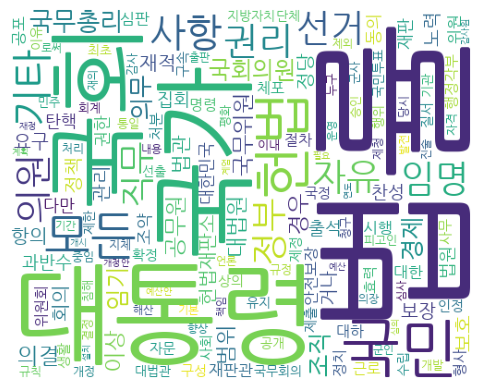

In [45]:
import matplotlib.pyplot as plt

plt.imshow(wc_img)
plt.axis('off')
plt.show()